## DBSCAN Practice

We're familiar with DBSCAN. Now, let's practice it!

Let's work with the [NHL data](https://github.com/josephofiowa/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

## Load our data

Feel free to also do basic EDA. At least check the head()!

In [3]:
NHL = pd.read_csv("https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv")

In [5]:

NHL.shape

(90, 28)

In [6]:
NHL.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


## Set up our X

Let's cluster on all features EXCEPT team, rank, and points.

(Bonus idea: make rank be our y category if we want to engage in additional clustering evaluation.)

In [7]:
NHL.columns

Index([u'Team', u'PTS', u'Rank', u'TOI', u'GF', u'GA', u'GF60', u'GA60',
       u'GF%', u'SF', u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60',
       u'FA60', u'FF%', u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%',
       u'PDO', u'PIM'],
      dtype='object')

In [28]:
X= NHL[[ u'GF', u'GA', u'GF60', u'GA60',
       u'GF%', u'SF', u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60',
       u'FA60', u'FF%', u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%',
       u'PDO', u'PIM']]

In [9]:
X.head()

,TOI,GF,GA,GF60,GA60,GF%,SF,SA,SF60,SA60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,2001:52:00,115,73,3.45,2.19,61.2,1112,1047,33.3,31.4,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,2056:14:00,94,72,2.74,2.10,56.6,1143,1053,33.4,30.7,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,1929:54:00,90,68,2.80,2.11,57.0,1065,1039,33.1,32.3,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,2020:23:00,104,83,3.09,2.46,55.6,1186,868,35.2,25.8,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,2052:02:00,86,74,2.51,2.16,53.8,1078,1115,31.5,32.6,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [10]:
y=NHL[u'PTS']

In [29]:
X.columns

Index([u'GF', u'GA', u'GF60', u'GA60', u'GF%', u'SF', u'SA', u'SF60', u'SA60',
       u'SF%', u'FF', u'FA', u'FF60', u'FA60', u'FF%', u'CF', u'CA', u'CF60',
       u'CA60', u'CF%', u'Sh%', u'Sv%', u'PDO', u'PIM'],
      dtype='object')

## Scatter plot EDA

Check two scatter plots. Make at least one of them be SOMETHING vs GF. Do we obtain a general idea of how many clusters we should witness?

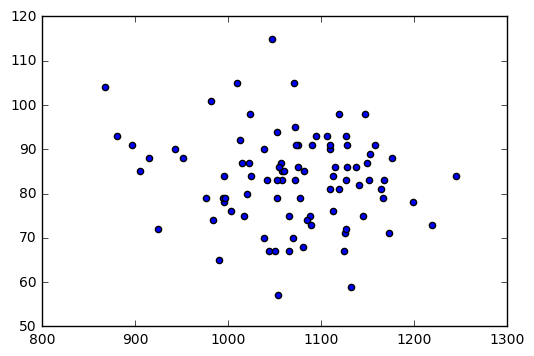

In [30]:
plt.scatter(X[u'SA'], X[u'GF'])




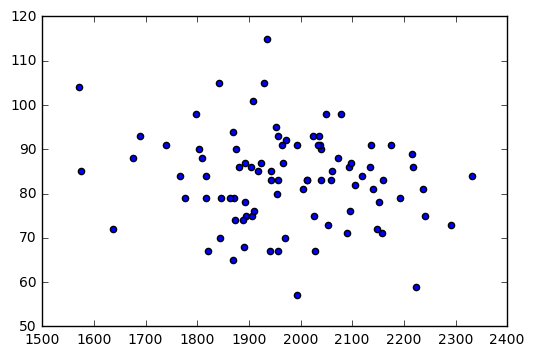

In [19]:
plt.scatter(X[u'CA'], X[u'GF'])

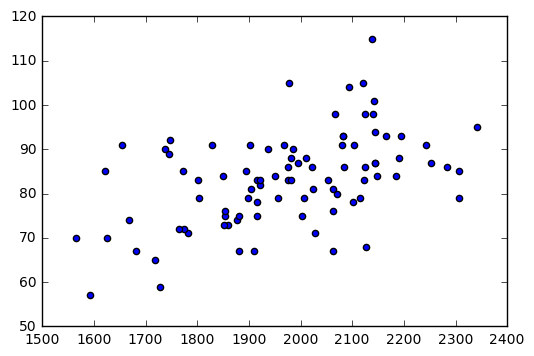

In [21]:
plt.scatter(X[u'CF'], X[u'GF'])
plt.show()

## Scale our data

Who does a DBSCAN on unscaled data?! Savages. That's who.

In [69]:
from sklearn import cluster, datasets, preprocessing, metrics
nx = preprocessing.StandardScaler().fit_transform(X)
dbscn = DBSCAN(eps = 2.3, min_samples = 2).fit(nx)  

## Instatiate our DBSCAN cluster

Remember to pass an epsilon and min_points of your choice.

## Store our labels

Using the `.labels_` command on our DBSCAN class

In [70]:
labels = dbscn.labels_  

print(labels) # comprehension: what do these mean? How many are there?


[-1  0 -1 -1 -1 -1  1 -1 -1 -1 -1  0 -1 -1  2 -1 -1 -1 -1 -1 -1  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  1 -1  5 -1 -1  3 -1 -1 -1  5
  5  6 -1  6  7 -1 -1 -1  8  4 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1  8 -1 -1
 -1  2  4 -1  2 -1 -1 10 10  9 -1  5  7  9 -1]


## Evaluate our cluster!

Let's check the silhouette score. As a bonus, if you set our y as rank, check out the homogenity, completeness, and v-measure. For the adventurous, see how you can adjust our epsilon and min_points to improve these.

In [71]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)


[False  True False False False False  True False False False False  True
 False False  True False False False False False False  True False False
 False False False False False False False False False False False False
  True False False False  True False  True False False  True False False
 False  True  True  True False  True  True False False False  True  True
 False False False False False False False False  True False False False
  True False False False  True  True False  True False False  True  True
  True False  True  True  True False]


In [62]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [72]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(nx, labels))



Estimated number of clusters: 0
Homogeneity: 0.261
Completeness: 0.719
V-measure: 0.383
Silhouette Coefficient: -0.169


## Optional: plot our clusters

Let's do this just like we did with the iris dataset.

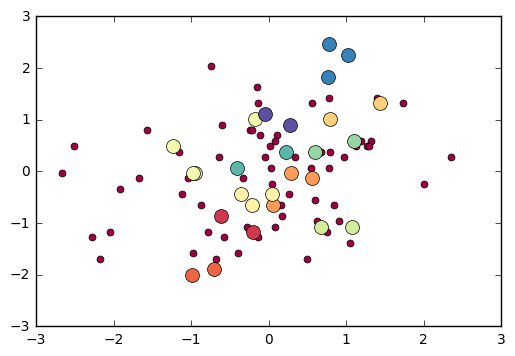

In [82]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = nx[class_member_mask & core_samples]
    plt.plot(n[:,6],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = nx[class_member_mask & ~core_samples]
    plt.plot(n[:,6],n[:,1], 'o', markerfacecolor = color, markersize = 5)

In [76]:
n

array([], shape=(0, 24), dtype=float64)

In [78]:
nx.shape

(90, 24)